In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import json
train_idx = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['train_idx'].flatten()
camId = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['camId'].flatten()
filelist = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['filelist'].flatten()
gallery_idx = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['gallery_idx'].flatten()
labels = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['labels'].flatten()
query_idx = loadmat('PR_data/cuhk03_new_protocol_config_labeled.mat')['query_idx'].flatten()
with open('PR_data/feature_data.json', 'r') as f:
    features = np.array(json.load(f))
#remove index offset
train_idx -= 1
gallery_idx -= 1
query_idx -= 1
#normalise data between 0 and 1
features = np.divide(features, np.amax(features))

In [2]:
train_features = features[train_idx.tolist()]
gallery_features = features[gallery_idx.tolist()]
query_features = features[query_idx.tolist()]

train_label = labels[train_idx.tolist()]
gallery_label = labels[gallery_idx.tolist()]
query_label = labels[query_idx.tolist()]

train_cam = camId[train_idx.tolist()]
gallery_cam = camId[gallery_idx.tolist()]
query_cam = camId[query_idx.tolist()]

In [3]:
from sklearn.neighbors import KNeighborsClassifier
def KNN_Ranking(num_neighbours, metric, rankN, p=3):
    ranks = [0]*len(rankN)
    if metric == 'minkowski':
        classifier = KNeighborsClassifier(n_neighbors=num_neighbours,metric=metric, p = p)
    else:
        classifier = KNeighborsClassifier(n_neighbors=num_neighbours,metric=metric)
    classifier.fit(gallery_features,gallery_label)
    values = classifier.kneighbors(query_features)
    
    for i in range(len(query_idx)):
        cam_match = 0
        for j in range(len(values[1][i])):
            if gallery_label[values[1][i][j]] == query_label[i] and gallery_cam[values[1][i][j]] != query_cam[i]:

                for k in range(len(rankN)):
                    if j - cam_match <= rankN[k]-1:
                        ranks[k] += 1
                break

            elif gallery_label[values[1][i][j]] == query_label[i] and gallery_cam[values[1][i][j]] == query_cam[i]:
                cam_match += 1
    for i in range(len(ranks)):
        ranks[i] = ranks[i]/len(query_label)
    print(metric)
    return ranks

In [4]:
rank = range(1,101)
rank_euc = KNN_Ranking(120, 'euclidean', rank)
rank_man = KNN_Ranking(120, 'manhattan', rank)
rank_min3 = KNN_Ranking(120, 'minkowski', rank, p=3)
rank_min4 = KNN_Ranking(120, 'minkowski', rank, p=4)

euclidean
manhattan
minkowski
minkowski


In [6]:
rank_nn = np.load('Ranks.npy')

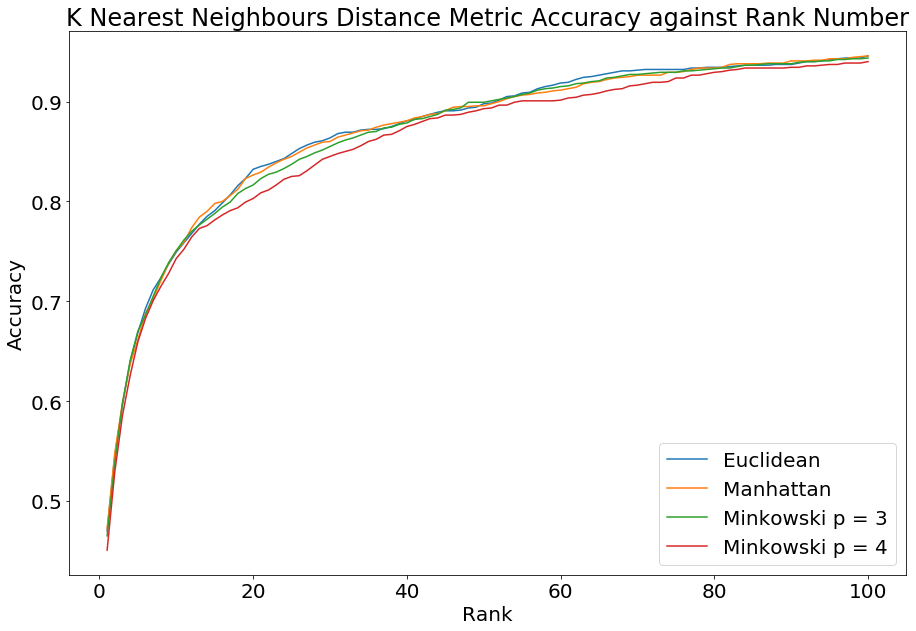

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 20})
plt.plot(rank, rank_euc)
plt.plot(rank, rank_man)
plt.plot(rank, rank_min3)
plt.plot(rank, rank_min4)
plt.title('K Nearest Neighbours Distance Metric Accuracy against Rank Number')
plt.ylabel('Accuracy')
plt.xlabel('Rank')
plt.legend(['Euclidean','Manhattan','Minkowski p = 3','Minkowski p = 4'])
plt.show()

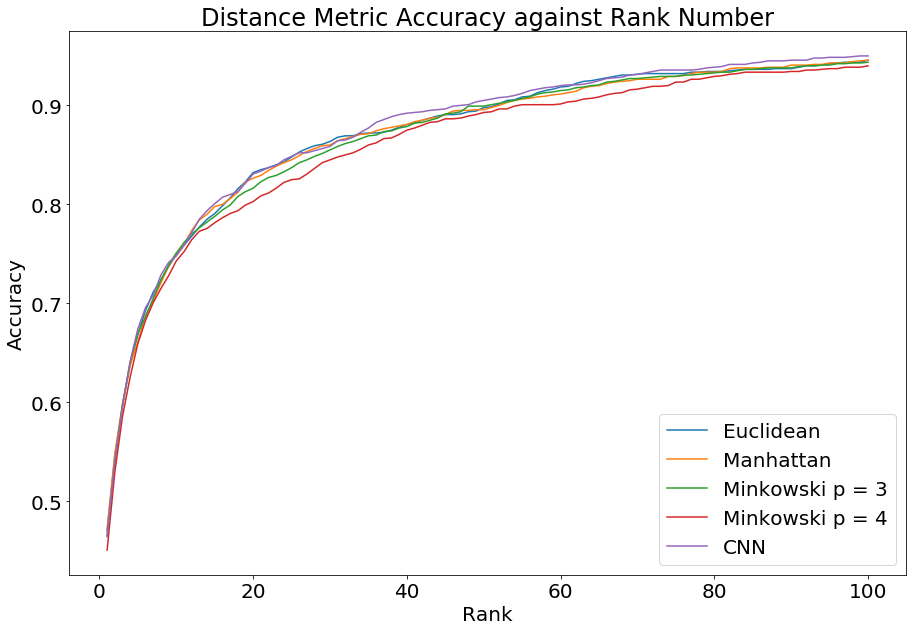

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 20})
plt.plot(rank, rank_euc)
plt.plot(rank, rank_man)
plt.plot(rank, rank_min3)
plt.plot(rank, rank_min4)
plt.plot(rank, rank_nn)
plt.title('Distance Metric Accuracy against Rank Number')
plt.ylabel('Accuracy')
plt.xlabel('Rank')
plt.legend(['Euclidean','Manhattan','Minkowski p = 3','Minkowski p = 4','CNN'])
plt.show()

In [10]:
for i in [0,4,9]:
    print(rank_euc[i],rank_man[i],rank_min3[i],rank_min4[i],rank_nn[i])

0.47 0.47214285714285714 0.465 0.45071428571428573 0.4642857142857143
0.6685714285714286 0.6614285714285715 0.67 0.6592857142857143 0.6742857142857143
0.7492857142857143 0.7507142857142857 0.7507142857142857 0.7428571428571429 0.7478571428571429


In [11]:
np.save('Ranks_Euclidean',rank_euc)
np.save('Ranks_Manhattan',rank_man)
np.save('Ranks_Minkowski3',rank_min3)
np.save('Ranks_Minkowski4',rank_min4)

In [13]:
rank_min05 = KNN_Ranking(120, 'minkowski', rank, p=1.5)

minkowski


In [14]:
for i in [0,4,9]:
    print(rank_min05[i])

0.4735714285714286
0.6664285714285715
0.7478571428571429


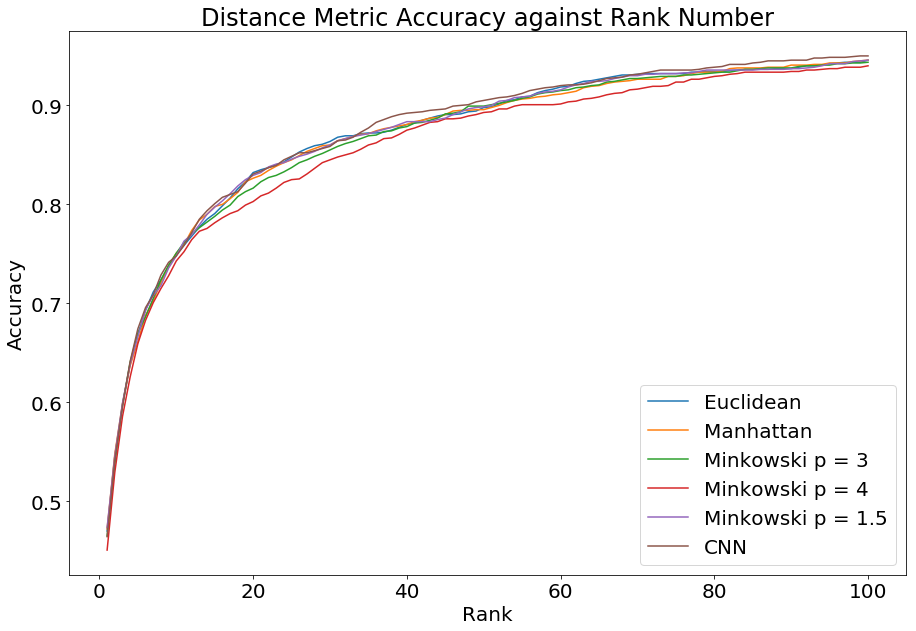

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15,10)
plt.rcParams.update({'font.size': 20})
plt.plot(rank, rank_euc)
plt.plot(rank, rank_man)
plt.plot(rank, rank_min3)
plt.plot(rank, rank_min4)
plt.plot(rank, rank_min05)
plt.plot(rank, rank_nn)
plt.title('Distance Metric Accuracy against Rank Number')
plt.ylabel('Accuracy')
plt.xlabel('Rank')
plt.legend(['Euclidean','Manhattan','Minkowski p = 3','Minkowski p = 4','Minkowski p = 1.5','CNN'])
plt.show()